# Preliminaries

In this lab, we will briefly walk through the datasets used throughout the class, and apply some basic data loading, visualization, and processing

In [1]:
!pip3 install xlrd==1.2.0
!pip3 install openpyxl

In [2]:
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import numpy as np
import openpyxl
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import scale
%matplotlib inline

# 1. Data loading

## 1.1. Read data with pandas



In [3]:
df = pd.read_csv('https://gitlab.com/machine-learning-course1/ml-practice-lg-2024-spring/-/raw/main/Data/Advertising.csv?inline=false', usecols=[1,2,3,4])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [4]:
df.head()

TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3    9.3
3  151.5   41.3       58.5   18.5
4  180.8   10.8       58.4   12.9

In [5]:
df = pd.read_excel('https://gitlab.com/machine-learning-course1/ml-practice-lg-2024-spring/-/raw/main/Data/Default.xlsx?inline=false')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  10000 non-null  int64  
 1   default     10000 non-null  object 
 2   student     10000 non-null  object 
 3   balance     10000 non-null  float64
 4   income      10000 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 390.8+ KB


In [6]:
df = pd.read_excel('https://gitlab.com/machine-learning-course1/ml-practice-lg-2024-spring/-/raw/main/Data/Default2.xlsx?inline=false', engine='openpyxl')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  10000 non-null  int64  
 1   default     10000 non-null  object 
 2   student     10000 non-null  object 
 3   balance     10000 non-null  float64
 4   income      10000 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 390.8+ KB


## 1.2. Print the loaded data

In [7]:
df = pd.read_excel('https://gitlab.com/machine-learning-course1/ml-practice-lg-2024-spring/-/raw/main/Data/Default.xlsx?inline=false')
df.head(5)

Unnamed: 0 default student      balance        income
0           1      No      No   729.526495  44361.625074
1           2      No     Yes   817.180407  12106.134700
2           3      No      No  1073.549164  31767.138947
3           4      No      No   529.250605  35704.493935
4           5      No      No   785.655883  38463.495879

In [8]:
df.tail(3)

Unnamed: 0 default student      balance        income
9997        9998      No      No   845.411989  58636.156984
9998        9999      No      No  1569.009053  36669.112365
9999       10000      No     Yes   200.922183  16862.952321

In [9]:
df = pd.read_csv('https://gitlab.com/machine-learning-course1/ml-practice-lg-2024-spring/-/raw/main/Data/Advertising.csv?inline=false', usecols=[1,2,3,4])
df.head()

TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3    9.3
3  151.5   41.3       58.5   18.5
4  180.8   10.8       58.4   12.9

In [10]:
type(df['TV'])

pandas.core.series.Series

In [11]:
type(df[['TV']])

pandas.core.frame.DataFrame

In [12]:
df = pd.read_csv('https://gitlab.com/machine-learning-course1/ml-practice-lg-2024-spring/-/raw/main/Data/Advertising.csv?inline=false', usecols=[1,2,3,4])
df[['Radio', 'TV', 'Newspaper']].describe()

Radio          TV   Newspaper
count  200.000000  200.000000  200.000000
mean    23.264000  147.042500   30.554000
std     14.846809   85.854236   21.778621
min      0.000000    0.700000    0.300000
25%      9.975000   74.375000   12.750000
50%     22.900000  149.750000   25.750000
75%     36.525000  218.825000   45.100000
max     49.600000  296.400000  114.000000

## 1.3. Select a few features from the data

In [13]:
df = pd.read_csv('https://gitlab.com/machine-learning-course1/ml-practice-lg-2024-spring/-/raw/main/Data/Hitters.csv?inline=false')
df.head(3)

Unnamed: 0  AtBat  Hits  HmRun  Runs  RBI  Walks  Years  CAtBat  CHits  \
0  -Andy Allanson    293    66      1    30   29     14      1     293     66   
1     -Alan Ashby    315    81      7    24   38     39     14    3449    835   
2    -Alvin Davis    479   130     18    66   72     76      3    1624    457   

   ...  CRuns  CRBI  CWalks  League Division PutOuts  Assists  Errors  Salary  \
0  ...     30    29      14       A        E     446       33      20     NaN   
1  ...    321   414     375       N        W     632       43      10   475.0   
2  ...    224   266     263       A        W     880       82      14   480.0   

   NewLeague  
0          A  
1          N  
2          A  

[3 rows x 21 columns]

In [14]:
feature_names = ['Years', 'Hits']

X = df[feature_names]
X.head()

Years  Hits
0      1    66
1     14    81
2      3   130
3     11   141
4      2    87

## 1.4. Add a new feature to the data

In [15]:
credit = pd.read_csv('https://gitlab.com/machine-learning-course1/ml-practice-lg-2024-spring/-/raw/main/Data/Credit.csv?inline=false', usecols=list(range(1,12)))
credit.head(3)

Income  Limit  Rating  Cards  Age  Education  Gender Student Married  \
0   14.891   3606     283      2   34         11    Male      No     Yes   
1  106.025   6645     483      3   82         15  Female     Yes     Yes   
2  104.593   7075     514      4   71         11    Male      No      No   

   Ethnicity  Balance  
0  Caucasian      333  
1      Asian      903  
2      Asian      580

In [16]:
credit.Student
credit['Student']

0       No
1      Yes
2       No
3       No
4       No
      ... 
395     No
396     No
397     No
398     No
399     No
Name: Student, Length: 400, dtype: object

In [17]:
credit['Student2'] = credit.Student.map({'No':0, 'Yes':1})
number_student = credit.Student.map({'No':0, 'Yes':1})
credit.head(3)

Income  Limit  Rating  Cards  Age  Education  Gender Student Married  \
0   14.891   3606     283      2   34         11    Male      No     Yes   
1  106.025   6645     483      3   82         15  Female     Yes     Yes   
2  104.593   7075     514      4   71         11    Male      No      No   

   Ethnicity  Balance  Student2  
0  Caucasian      333         0  
1      Asian      903         1  
2      Asian      580         0

## 1.5. Removing features from the data

In [18]:
df = pd.read_csv('https://gitlab.com/machine-learning-course1/ml-practice-lg-2024-spring/-/raw/main/Data/Heart.csv?inline=false')
df.head(3)

Unnamed: 0  Age  Sex     ChestPain  RestBP  Chol  Fbs  RestECG  MaxHR  \
0           1   63    1       typical     145   233    1        2    150   
1           2   67    1  asymptomatic     160   286    0        2    108   
2           3   67    1  asymptomatic     120   229    0        2    129   

   ExAng  Oldpeak  Slope   Ca        Thal  AHD  
0      0      2.3      3  0.0       fixed   No  
1      1      1.5      2  3.0      normal  Yes  
2      1      2.6      2  2.0  reversable  Yes

In [19]:
df = pd.read_csv('https://gitlab.com/machine-learning-course1/ml-practice-lg-2024-spring/-/raw/main/Data/Heart.csv?inline=false')
df = df.drop('Unnamed: 0', axis=1).dropna()
df.head(3)

Age  Sex     ChestPain  RestBP  Chol  Fbs  RestECG  MaxHR  ExAng  Oldpeak  \
0   63    1       typical     145   233    1        2    150      0      2.3   
1   67    1  asymptomatic     160   286    0        2    108      1      1.5   
2   67    1  asymptomatic     120   229    0        2    129      1      2.6   

   Slope   Ca        Thal  AHD  
0      3  0.0       fixed   No  
1      2  3.0      normal  Yes  
2      2  2.0  reversable  Yes

In [20]:
df = pd.read_csv('https://gitlab.com/machine-learning-course1/ml-practice-lg-2024-spring/-/raw/main/Data/Heart.csv?inline=false')
df = df.drop('ChestPain', axis=1).dropna()
df.head(3)

Unnamed: 0  Age  Sex  RestBP  Chol  Fbs  RestECG  MaxHR  ExAng  Oldpeak  \
0           1   63    1     145   233    1        2    150      0      2.3   
1           2   67    1     160   286    0        2    108      1      1.5   
2           3   67    1     120   229    0        2    129      1      2.6   

   Slope   Ca        Thal  AHD  
0      3  0.0       fixed   No  
1      2  3.0      normal  Yes  
2      2  2.0  reversable  Yes

In [21]:
filled_cols = df[['Age', 'Sex']].fillna(0)

df[['Age', 'Sex']].fillna(0, inplace=True)

df[['Age', 'Sex']] = df[['Age', 'Sex']].fillna(0)

# 2. Visualization

## 2.1. Scatter plot

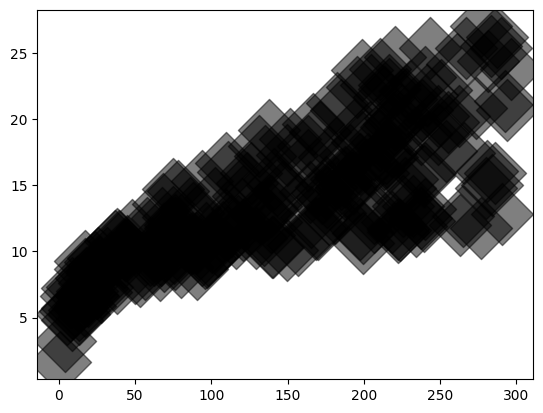

In [22]:
advertising = pd.read_csv('https://gitlab.com/machine-learning-course1/ml-practice-lg-2024-spring/-/raw/main/Data/Advertising.csv?inline=false', usecols=[1,2,3,4])

X = advertising.TV
y = advertising.Sales

plt.scatter(X, y, c='black', s=1000, marker='D', alpha=0.5)

plt.show()

## 2.2. Histogram

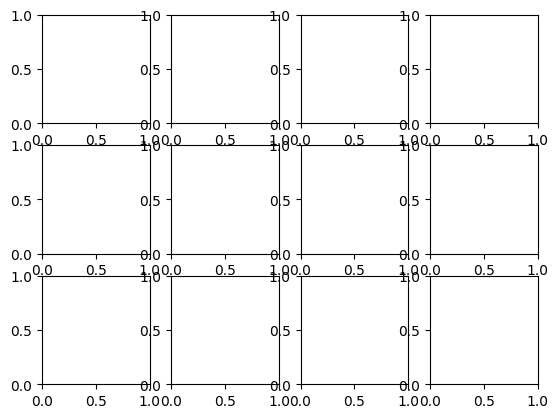

In [23]:
fig, axes = plt.subplots(nrows=3, ncols=4)
ax = axes[0,0]

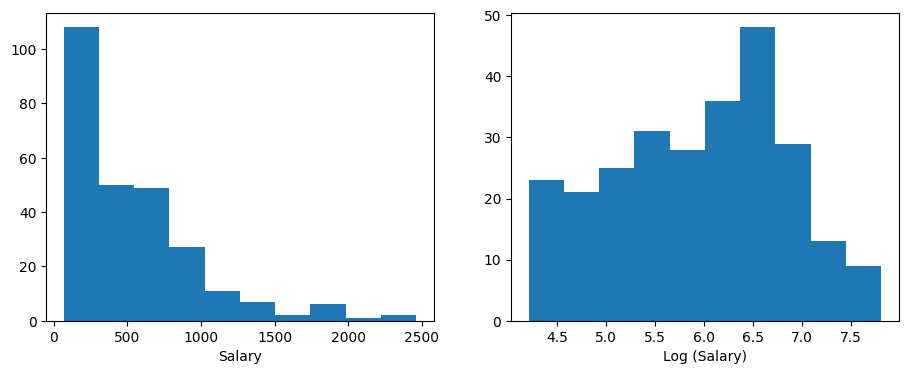

In [24]:
df = pd.read_csv('https://gitlab.com/machine-learning-course1/ml-practice-lg-2024-spring/-/raw/main/Data/Hitters.csv?inline=false').dropna()
df.head(3)

# Prepare X, y
feature_names = ['Years', 'Hits']
X = df[feature_names].values
y = np.log(df['Salary'].values)

# fig, axes = plt.subplots(1, 2, figsize=(11,4))
# ax1, ax2 = axes[0], axes[1]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(11,4))
ax1.hist(df['Salary'].values)
ax1.set_xlabel('Salary')
ax2.hist(y)
ax2.set_xlabel('Log (Salary)');
plt.show()

## 2.3. Overlaying multiple plots

(0.0, 333.25527471319606)

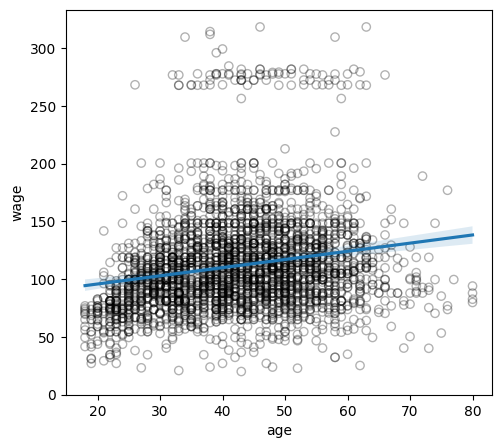

In [25]:
df_wage = pd.read_csv('https://gitlab.com/machine-learning-course1/ml-practice-lg-2024-spring/-/raw/main/Data/Wage.csv?inline=false')
df_wage.head(3)

fig, ax = plt.subplots(1, 1, figsize=(5.5, 5))
ax.scatter(df_wage.age, df_wage.wage, facecolor='None', edgecolor='k', alpha=0.3)
sns.regplot(data=df_wage, x='age', y='wage', order=1, truncate=True, scatter=False, ax=ax, ci=100)
ax.set_ylim(ymin=0)

# 3. Data processing

## 3.1. Normalizing the data

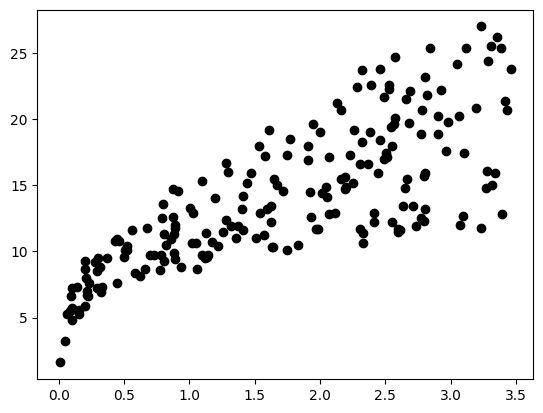

In [26]:
advertising = pd.read_csv('https://gitlab.com/machine-learning-course1/ml-practice-lg-2024-spring/-/raw/main/Data/Advertising.csv?inline=false', usecols=[1,2,3,4])
# advertising.info()

X = scale(advertising.TV, with_mean=False, with_std=True)
# X = advertising.TV
y = advertising.Sales

plt.scatter(X, y,  color='black')

plt.show()

## 3.2. Factorizing the data

In [27]:
df = pd.read_excel('https://gitlab.com/machine-learning-course1/ml-practice-lg-2024-spring/-/raw/main/Data/Default.xlsx?inline=false')
df.head(3)

Unnamed: 0 default student      balance        income
0           1      No      No   729.526495  44361.625074
1           2      No     Yes   817.180407  12106.134700
2           3      No      No  1073.549164  31767.138947

In [28]:
# factorize() returns two objects: a label array and an array with the unique values
df['default'], target_names = df['default'].factorize()
df['student'], _ = df['student'].factorize()

print('Target names:', target_names)
df.head(3)

Target names: Index(['No', 'Yes'], dtype='object')


Unnamed: 0  default  student      balance        income
0           1        0        0   729.526495  44361.625074
1           2        0        1   817.180407  12106.134700
2           3        0        0  1073.549164  31767.138947

# Exercise

1. Load "/content/drive/MyDrive/ml-practice-lg-2024-spring/Notebooks/Data/Auto.csv" and print the first and the last 5 rows of the dataset.
2. Print the dataset description using the info() function to find out how many data there is.
3. Select only the 'horsepower' and 'mpg' features.
4. Plot the scatter plot of the ('horsepower', 'mpg') from the loaded dataset.
5. Plot the histogram of the 'horsepower' values from the loaded dataset.

In [29]:
def is_float_try(str):
    try:
        float(str)
        return True
    except ValueError:
        return False

# Load https://gitlab.com/machine-learning-course1/ml-practice-lg-2024-spring/-/raw/main/Data/Auto.csv?inline=false
df = pd.read_csv('https://gitlab.com/machine-learning-course1/ml-practice-lg-2024-spring/-/raw/main/Data/Auto.csv?inline=false')
df = df[df[['horsepower']].applymap(is_float_try).values.reshape(-1)]
df['horsepower'] = df['horsepower'].astype(np.float64)
df.head()

mpg  cylinders  displacement  horsepower  weight  acceleration  year  \
0  18.0          8         307.0       130.0    3504          12.0    70   
1  15.0          8         350.0       165.0    3693          11.5    70   
2  18.0          8         318.0       150.0    3436          11.0    70   
3  16.0          8         304.0       150.0    3433          12.0    70   
4  17.0          8         302.0       140.0    3449          10.5    70   

   origin                       name  
0       1  chevrolet chevelle malibu  
1       1          buick skylark 320  
2       1         plymouth satellite  
3       1              amc rebel sst  
4       1                ford torino

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 396
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   year          392 non-null    int64  
 7   origin        392 non-null    int64  
 8   name          392 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 30.6+ KB


In [31]:
# Print the first 5 rows of the dataset
df.head(3)

mpg  cylinders  displacement  horsepower  weight  acceleration  year  \
0  18.0          8         307.0       130.0    3504          12.0    70   
1  15.0          8         350.0       165.0    3693          11.5    70   
2  18.0          8         318.0       150.0    3436          11.0    70   

   origin                       name  
0       1  chevrolet chevelle malibu  
1       1          buick skylark 320  
2       1         plymouth satellite

In [32]:
# Print the last 5 rows of the dataset.
df.tail(3)

mpg  cylinders  displacement  horsepower  weight  acceleration  year  \
394  32.0          4         135.0        84.0    2295          11.6    82   
395  28.0          4         120.0        79.0    2625          18.6    82   
396  31.0          4         119.0        82.0    2720          19.4    82   

     origin           name  
394       1  dodge rampage  
395       1    ford ranger  
396       1     chevy s-10

In [33]:
df.describe()

mpg   cylinders  displacement  horsepower       weight  \
count  392.000000  392.000000    392.000000  392.000000   392.000000   
mean    23.445918    5.471939    194.411990  104.469388  2977.584184   
std      7.805007    1.705783    104.644004   38.491160   849.402560   
min      9.000000    3.000000     68.000000   46.000000  1613.000000   
25%     17.000000    4.000000    105.000000   75.000000  2225.250000   
50%     22.750000    4.000000    151.000000   93.500000  2803.500000   
75%     29.000000    8.000000    275.750000  126.000000  3614.750000   
max     46.600000    8.000000    455.000000  230.000000  5140.000000   

       acceleration        year      origin  
count    392.000000  392.000000  392.000000  
mean      15.541327   75.979592    1.576531  
std        2.758864    3.683737    0.805518  
min        8.000000   70.000000    1.000000  
25%       13.775000   73.000000    1.000000  
50%       15.500000   76.000000    1.000000  
75%       17.025000   79.000000    2.000000  
max       24.800000   82.000000    3.000000

In [34]:
# Select only the 'horsepower' and 'mpg' features.
features = df[['horsepower']]
features = df['horsepower']

features = df[['horsepower', 'mpg']]
features.head()

horsepower   mpg
0       130.0  18.0
1       165.0  15.0
2       150.0  18.0
3       150.0  16.0
4       140.0  17.0

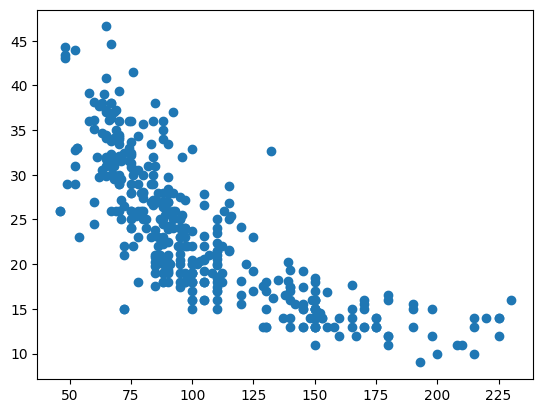

In [35]:
# Plot the scatter plot of the ('horsepower', 'mpg') from the loaded dataset.
plt.scatter(features['horsepower'], features['mpg'])

(array([ 27.,  95., 120.,  44.,  19.,  47.,  13.,  14.,   5.,   8.]),
 array([ 46. ,  64.4,  82.8, 101.2, 119.6, 138. , 156.4, 174.8, 193.2,
        211.6, 230. ]),
 <BarContainer object of 10 artists>)

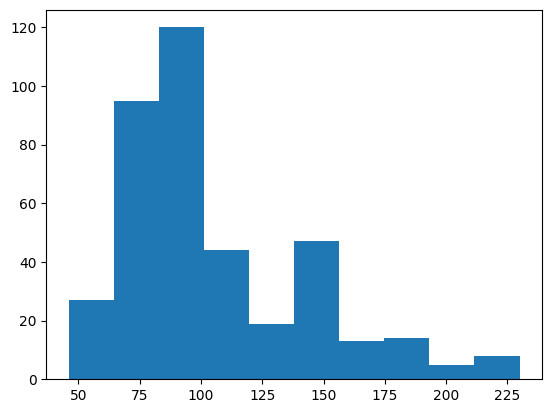

In [36]:
# Plot the histogram of the 'horsepower' values from the loaded dataset.
plt.hist(df['horsepower'])